In [46]:
import requests
import pandas as pd
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from skimage import io, transform
import matplotlib.pyplot as plt
import time

In [28]:
print(os.getcwd())
print(os.listdir())

/home/rightleftspin/Git_Repos/JPAstro
['SDSS', 'adv-gal-exercise1.xls', 'results.csv', 'specutils_demo.ipynb', 'test', 'IntroImages', 'Perseus Cluster.ipynb', 'PCC_cat.txt', 'Astro Introbook.ipynb', 'path', 'DGSATI-HST.ipynb', '.git', 'Perseus Cluster.ipynb.old', 'flake.nix', '.ipynb_checkpoints', 'flake.lock', 'Skyserver_Radial9_28_2022 7_00_56 AM.csv', '.gitignore', 'Wittmann_etal19.pdf']


In [44]:
# testUrl = f'https://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg?TaskName=Skyserver.Explore.Image&ra={raEx}&dec={dcEx}&scale=0.1&width=200&height=200' 
# testUrl
stringCont = 'Here is a particularly long string'\
' and here is the rest'

stringCont

'Here is a particularly long string and here is the rest'

In [30]:
df0 = pd.read_fwf('PCC_cat.txt', header=None)
df0

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,NaN,PCC-0001,49.2355,41.5722,20.51,0.04,1.44,0.10,20.80,1.07,...,0.69,0.25,0.63,0.28,NaN,NaN,Likely cluster or background edge-on disk galaxy,NaN,NaN,http://dc.zah.uni-heidelberg.de/pcc/q/stamp/dl...
1,NaN,PCC-0002,49.2366,41.4013,20.44,0.04,2.18,0.14,21.96,0.79,...,1.53,1.01,1.38,0.97,NaN,NaN,Likely cluster or background edge-on disk galaxy,NaN,NaN,http://dc.zah.uni-heidelberg.de/pcc/q/stamp/dl...
2,NaN,PCC-0003,49.2370,41.4336,21.58,0.04,1.11,0.07,22.41,0.07,...,1.25,0.71,1.19,0.67,NaN,NaN,Likely cluster or background edge-on disk galaxy,NaN,NaN,http://dc.zah.uni-heidelberg.de/pcc/q/stamp/dl...
3,NaN,PCC-0004,49.2377,41.5285,21.03,0.06,1.08,0.10,23.14,0.69,...,0.58,0.25,0.42,0.15,NaN,NaN,Likely background ETG or unresolved source,NaN,NaN,http://dc.zah.uni-heidelberg.de/pcc/q/stamp/dl...
4,NaN,PCC-0005,49.2380,41.4346,20.27,0.02,1.24,0.04,21.94,0.80,...,0.70,0.50,0.53,0.48,NaN,NaN,Likely cluster or background edge-on disk galaxy,NaN,NaN,http://dc.zah.uni-heidelberg.de/pcc/q/stamp/dl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,NaN,PCC-5433,50.0062,41.2380,20.32,NaN,1.10,NaN,22.53,3.80,...,0.97,0.83,0.93,0.69,NaN,NaN,Likely background ETG or unresolved source,NaN,NaN,http://dc.zah.uni-heidelberg.de/pcc/q/stamp/dl...
5433,NaN,PCC-5434,50.0064,41.2568,22.63,NaN,0.54,NaN,23.29,0.50,...,1.46,1.12,NaN,NaN,NaN,NaN,Likely cluster or background edge-on disk galaxy,NaN,NaN,http://dc.zah.uni-heidelberg.de/pcc/q/stamp/dl...
5434,NaN,PCC-5435,50.0068,41.6048,21.44,0.02,0.61,0.02,21.52,0.43,...,0.59,0.41,NaN,NaN,NaN,NaN,Likely cluster or background edge-on disk galaxy,NaN,NaN,http://dc.zah.uni-heidelberg.de/pcc/q/stamp/dl...
5435,NaN,PCC-5436,50.0070,41.3916,21.32,0.07,0.99,0.10,22.86,0.95,...,1.19,1.07,1.06,0.92,NaN,NaN,Cluster or background LTG,NaN,NaN,http://dc.zah.uni-heidelberg.de/pcc/q/stamp/dl...


In [52]:
ra = df0[2]
dec = df0[3]

# think about pausing every 100 images or so

# for i in range(len(ra)):
for i in range(800):
    urlVar = f'https://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/'\
    f'getjpeg?TaskName=Skyserver.Explore.Image&ra={str(ra[i]).strip()}'\
    f'&dec={str(dec[i]).strip()}&scale=0.1&width=200&height=200'
    
    # tell the loop to pause for a bit - every 100 images
    if i%100==0:
        time.sleep(5)
        
    img_data = requests.get(urlVar).content
    with open(f'waittest/sdss_ra={ra[i]}_dec={dec[i]}.jpeg', 'wb') as handler:
        handler.write(img_data)

ConnectionError: ('Connection aborted.', TimeoutError(110, 'Connection timed out'))

In [45]:

ra = df0[2]
dec = df0[3]
images = [f'https://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/'\
          f'getjpeg?TaskName=Skyserver.Explore.Image&ra={str(ra[i]).strip()}'\
          f'&dec={str(dec[i]).strip()}&scale=0.1&width=200&height=200' for i in range(len(ra))]


print(len(images))

print(images[0])
print(images[-1])

5437
https://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg?TaskName=Skyserver.Explore.Image&ra=49.2355&dec=41.5722&scale=0.1&width=200&height=200
https://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg?TaskName=Skyserver.Explore.Image&ra=50.0089&dec=41.6781&scale=0.1&width=200&height=200


In [32]:
# os.path.join('SDSS', f'sdss_ra={str(df0[2][1])}_dec={str(df0[3][1])}.jpeg')

class PerseusDataset(torch.utils.data.Dataset):
    def __init__(self, fwf_file, img_dir):
        
        self.catalogue_frame = pd.read_fwf(fwf_file, header=None)
        self.img_dir = img_dir        

    def __len__(self):
        return len(self.catalogue_frame)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        img_name = os.path.join(self.img_dir,
                                f'sdss_ra={str(self.catalogue_frame[2][idx]).strip()}'\
                                f'_dec={str(self.catalogue_frame[3][idx]).strip()}.jpeg')
        
        image = io.imread(img_name)
        return(image)

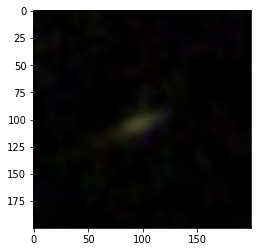

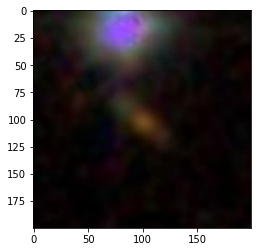

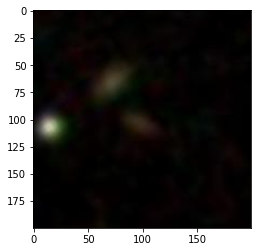

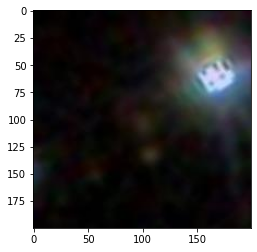

In [33]:
dataset0 = PerseusDataset(fwf_file = 'PCC_cat.txt',
                          img_dir = 'SDSS')

for i in range(4):
    plt.figure()
    plt.imshow(dataset0[i])

In [34]:
loader = torch.utils.data.DataLoader(dataset0, batch_size = 10)

In [47]:
for batch in loader:
    print(batch.shape)

torch.Size([10, 200, 200, 3])
torch.Size([10, 200, 200, 3])
torch.Size([10, 200, 200, 3])
torch.Size([10, 200, 200, 3])
torch.Size([10, 200, 200, 3])


ValueError: Could not find a backend to open `SDSS/sdss_ra=49.2549_dec=41.34.jpeg`` with iomode `ri`.

In [51]:
for i in range(6000):
    if i%500==0:
        print(i)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
